<a href="https://colab.research.google.com/github/tingjhenjiang/python_ML_ntu_spring2019/blob/master/wk08_functionAPI_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras
## 使用Functional API打造神經網路，記得加一些像是分岔的部分在你的模型結構中
## 使用mnist 資料庫

In [ ]:
%matplotlib widget
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils, plot_model
from keras.layers import Dense, Activation, Dropout, Input, concatenate, add, Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, History
from keras.models import Model
import tensorflow as tf
#tf.enable_eager_execution()

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# 檢查資料維度

In [ ]:
print('The dimension is {0}, {1}, {2}, {3}.'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

The dimension is (60000, 28, 28), (60000,), (10000, 28, 28), (10000,).


In [ ]:
x_train_t = x_train.reshape(60000, 28*28)
x_test_t = x_test.reshape(10000, 28*28)
x_train_t = (x_train_t - x_train_t.min()) / (x_train_t.max() - x_train_t.min())
x_test_t = (x_test_t - x_test_t.min()) / (x_test_t.max() - x_test_t.min())
y_train_t = np_utils.to_categorical(y_train, 10)
y_test_t = np_utils.to_categorical(y_test, 10)

In [ ]:
inputlayer = Input(shape=(28*28,))
hiddenlayer_nodes1_1 = Dense(5, activation='relu')(inputlayer)
hiddenlayer_nodes2_1 = Dense(5, activation='sigmoid')(inputlayer)
hiddenlayer_nodes1_2 = Dense(10, activation='relu')(hiddenlayer_nodes1_1 )
hiddenlayer_nodes2_2 = Dense(20, activation='sigmoid')(hiddenlayer_nodes2_1 )
hiddenlayer_nodes1_3 = Dense(10, activation='relu')(hiddenlayer_nodes1_2 )
hiddenlayer_nodes2_3 = Dense(20, activation='sigmoid')(hiddenlayer_nodes2_2 )
hiddenlayer_nodes1_4 = Dense(10, activation='relu')(hiddenlayer_nodes1_3 )
hiddenlayer_nodes2_4 = Dense(20, activation='sigmoid')(hiddenlayer_nodes2_3 )

#hiddenlayer_nodes3_1 = Dense(5, activation='sigmoid')
#hiddenlayer_nodes3_2 = Dense(20, activation='sigmoid')(hiddenlayer_nodes3_1 )

merge = concatenate([hiddenlayer_nodes1_4, hiddenlayer_nodes2_4])
outputlayer = Dense(10, activation='softmax')(merge)
model = Model(inputs=[inputlayer], outputs=outputlayer)

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
plot_model(model, to_file='wk8_functionapi_fractured_model.png', show_shapes=True)
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 5)            3925        input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 5)            3925        input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 10)           60          dense_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

# 模型流程圖
<img src="https://github.com/tingjhenjiang/python_ML_ntu_spring2019/blob/master/wk8_functionapi_fractured_model.png?raw=1">

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_his = model.fit(x_train_t, y_train_t, batch_size=100, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 91s 2ms/step - loss: 1.2267 - acc: 0.5556
Epoch 2/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.5874 - acc: 0.8156
Epoch 3/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.4660 - acc: 0.8636
Epoch 4/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.4297 - acc: 0.8741
Epoch 5/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.4049 - acc: 0.8800


<function matplotlib.pyplot.show(*args, **kw)>

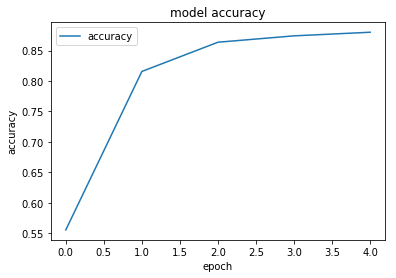

In [ ]:
plt.plot(model_his.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show

# Keras in TF2.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

def std_nparray(arr):
    arr = (arr-arr.min())/(arr.max()-arr.min())
    return(arr)

def convert_for_softmax_output(arr):
    return(tf.keras.utils.to_categorical(arr, num_classes=len(np.unique(arr)), dtype='float32'))

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,784) #x_train.reshape(60000, 784)
x_train = std_nparray(x_train)
x_test = x_test.reshape(-1, 784)
x_test = std_nparray(x_test)
y_train=convert_for_softmax_output(y_train)  #也可以不轉換，但下面要用sparse_categorical_crossentropy
y_test=convert_for_softmax_output(y_test)
x_val = x_train[-10000:]
y_val = y_train[-10000:]
print(x_train.shape)
print(x_train.dtype)
print(y_train)
print(y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
float64
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 10)


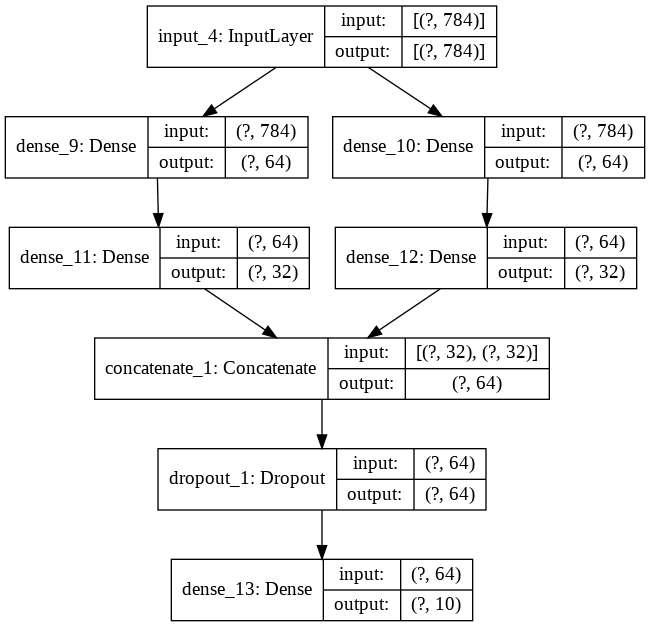

In [7]:
inputlayer = tf.keras.Input(shape=(784,))
hiddenlayer_nodes1_1 = tf.keras.layers.Dense(64, activation='relu')(inputlayer)
hiddenlayer_nodes2_1 = tf.keras.layers.Dense(64, activation='sigmoid')(inputlayer)
hiddenlayer_nodes1_2 = tf.keras.layers.Dense(32, activation='relu')(hiddenlayer_nodes1_1)
hiddenlayer_nodes2_2 = tf.keras.layers.Dense(32, activation='sigmoid')(hiddenlayer_nodes2_1)
mergelayer = tf.keras.layers.concatenate([hiddenlayer_nodes1_2, hiddenlayer_nodes2_2])
aftermerge_dropout = tf.keras.layers.Dropout(.2)(mergelayer)
outputlayer = tf.keras.layers.Dense(10, activation='softmax')(aftermerge_dropout)
model = tf.keras.Model(inputs=[inputlayer], outputs=outputlayer)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='CategoricalCrossentropy', #沒有to_categorical時可以用sparse_categorical_crossentropy
              metrics=['accuracy'],
              )
#model.summary()
tf.keras.utils.plot_model(
    model, show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [8]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0, validation_data=(x_val, y_val))

In [10]:
history.history

{'accuracy': [0.760952353477478,
  0.9017142653465271,
  0.9248095154762268,
  0.9388333559036255,
  0.9472380876541138,
  0.9534761905670166,
  0.9575476050376892,
  0.9629999995231628,
  0.9664285778999329,
  0.9682857394218445,
  0.9719761610031128,
  0.9730714559555054,
  0.9751666784286499,
  0.9769285917282104,
  0.9781428575515747,
  0.9794999957084656,
  0.9815475940704346,
  0.9830238223075867,
  0.9839524030685425,
  0.9843809604644775,
  0.9859047532081604,
  0.9868333339691162,
  0.9865952134132385,
  0.9875237941741943,
  0.9877856969833374,
  0.9887142777442932,
  0.989809513092041,
  0.9908333420753479,
  0.9919523596763611,
  0.9920714497566223,
  0.9919047355651855,
  0.9928333163261414,
  0.992642879486084,
  0.993238091468811,
  0.9935476183891296,
  0.9935238361358643,
  0.9934523701667786,
  0.9943095445632935,
  0.9948809742927551,
  0.9954761862754822,
  0.9949761629104614,
  0.993238091468811,
  0.9958571195602417,
  0.9955475926399231,
  0.9964761734008789,
  0

In [11]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)
#no dropout test loss, test acc: [0.13936419785022736, 0.9725000262260437]

Evaluate on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.9756
test loss, test acc: [0.14527449011802673, 0.975600004196167]
Generate predictions for 3 samples
predictions shape: (3, 10)


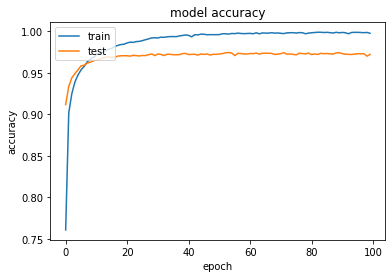

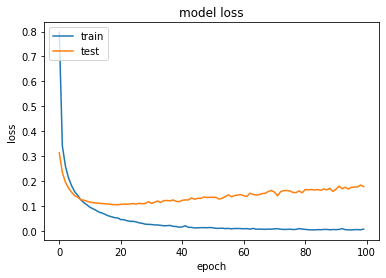

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()